In [1]:
#ch07_02_MLP_1000.ipynb

In [2]:
#為增加MLP model 準確率, 本範例將 隱藏層從256個神經元增加為1000個，討論 model效能

In [3]:
#step1 讀取並預處理資料

In [4]:
#step1.1 匯入所需模組, keras.utils.np_utils
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [5]:
#step1.1.a 將亂數種子固定
np.random.seed(10)

In [6]:
#step1.2 從keras.dataset 讀取 mnist 資料集
from keras.datasets import mnist

In [7]:
#step1.2.1 以mnist.load_data() method 讀取資料,(train/test)
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [8]:
#step1.3 將features(28x28 數字影像特徵值) reshape 為 1 dimension array (784),並轉換為float
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

In [9]:
#step1.4 將1.3的features標準化 (0.0~255.0)-->(0.0~1.0)
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [10]:
#step1.5 將label值(0,1,~9) One-hot encoding 編碼, 使用 np_utils.to_categorical() method
y_Train_OneHot=np_utils.to_categorical(y_train_label)
y_Test_OneHot=np_utils.to_categorical(y_test_label)

In [11]:
#=======================================================================================

In [12]:
#step2. 建立MLP模型, 輸入層(x),784個神經元;  隱藏層(h),增加為1000個神經元; 輸出層(y),10個神經元 

In [13]:
#step2.1 或入所需模組 keras.model.Sequentail, keras.layers.Dense
from keras.models import Sequential
from keras.layers import Dense

In [14]:
#step2.2 建立一個 Sequential model 's_model_1000'
#        The core data structure of Keras is a model, a way to organize layers.
#        The simplest type of model is the Sequential model, a linear stack of layers. 
s1000_model=Sequential()  #Linear stack of layers.

In [15]:
#step2.3 建立輸入層(x)及隱藏層(h), 以Sequential.add() method, 加入 Dense神經網路層
#        Dense() 函數 實作 h=relu(x*w1+b1) 隱藏層
s1000_model.add(Dense(units=1000,                      #設定隱藏層神經元個數256
                 input_dim=784,                   #設定輸入層神經元個數784
                 kernel_initializer='normal',     #使用 normal distribution 亂數,初始化 weight及bias
                 activation='relu'))              #activation function 'relu'

In [17]:
#step2.4 建立「輸出層」,使用Sequential.add() , Dense()
#        輸出層 activattion function 使用 softmax
#        Dense() 函數 實作 y=softmax(h1*w2+b2) 輸出層 
s1000_model.add(Dense(units=10,                      #設定輸出層神經元個數為10
                 kernel_initializer='normal',    #使用 normal distribution 亂數,初始化 weight及bias
                 activation='softmax'))          #activation function 'softmax'

In [18]:
#step2.5 檢視 Sequential model 's_model' 的摘要
print(s1000_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#====================================================================
#建立深度學習模型後，就可以使用反向傳播演算法(Back Propagation)進行訓練
#step3. 進行訓練

In [19]:
#step3.1 定義訓練方式
#        以 Sequential.compile(), 設定模型訓練方式
#        Compilation:
#        Before training a model, you need to configure the learning process, 
#        which is done via the compile method. It receives three arguments:
#            1.An optimizer.      (設定訓練時的優化方法, 如adam)
#            2.A loss function.   (設定損失函數, 如 cross_entropy)
#            3.A list of metrics. (設定評估模型的方式, 如 accuracy)
s1000_model.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])

In [20]:
#step3.2 開始訓練, 以Sequential.fit() 
train_history=s1000_model.fit(x=x_Train_normalize,                 #feature 數字影像標準化值
                         y=y_Train_OneHot,validation_split=0.2,    #lebel One-Hot encoding 值
                         epochs=10,batch_size=200,verbose=2)       #epochs, 訓練週期為 10

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 9s - loss: 0.2946 - acc: 0.9151 - val_loss: 0.1530 - val_acc: 0.9568
Epoch 2/10
 - 8s - loss: 0.1179 - acc: 0.9660 - val_loss: 0.1076 - val_acc: 0.9683
Epoch 3/10
 - 8s - loss: 0.0757 - acc: 0.9783 - val_loss: 0.0915 - val_acc: 0.9730
Epoch 4/10
 - 8s - loss: 0.0514 - acc: 0.9854 - val_loss: 0.0877 - val_acc: 0.9734
Epoch 5/10
 - 8s - loss: 0.0357 - acc: 0.9902 - val_loss: 0.0745 - val_acc: 0.9761
Epoch 6/10
 - 8s - loss: 0.0253 - acc: 0.9935 - val_loss: 0.0744 - val_acc: 0.9771
Epoch 7/10
 - 8s - loss: 0.0182 - acc: 0.9958 - val_loss: 0.0729 - val_acc: 0.9788
Epoch 8/10
 - 8s - loss: 0.0132 - acc: 0.9971 - val_loss: 0.0706 - val_acc: 0.9789
Epoch 9/10
 - 8s - loss: 0.0088 - acc: 0.9987 - val_loss: 0.0722 - val_acc: 0.9789
Epoch 10/10
 - 8s - loss: 0.0064 - acc: 0.9991 - val_loss: 0.0727 - val_acc: 0.9801


In [21]:
#step3.3 顯示(繪圖)訓練過程
#        讀取 train_history 中 loss 與 accuracy, 繪圖
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):  #define a function 'show_train_history'
    plt.plot(train_history.history[train])              #train_history.history 是一個 dict
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [22]:
train_history.history.keys()

dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])

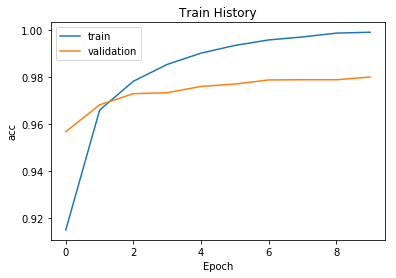

In [23]:
#step3.4 畫出 accuracy 執行結果, 使用 show_train_history
%matplotlib inline
show_train_history(train_history,'acc','val_acc')

In [24]:
#到目前為止，我們只是以 (x_train_image,y_train_label) (60000筆),依8:2 (train(8):test(2)) 做訓練模型評估
#後續, 我們會以另組獨立資料 (x_test_image,y_test_label) (10000筆) 評估模型準確率

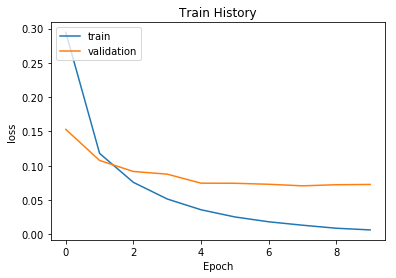

In [25]:
#step3.5 畫出 loss 誤差值
show_train_history(train_history,'loss','val_loss')

In [27]:
#step4. 以獨立的 10000 筆測試資料 (x_test_image,y_test_label) 評估模型準確率
#       使用 Sequential.evaluate() method
score=s1000_model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy=',score[1])

10000/10000 [==============================] - 1s 114us/step

accuracy= 0.979
